#Principal Components Analysis (PCA)
Let's explain how PCA works with the following simple dataset consisting of 200 data points with only two dimensions (x and y coordinates).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

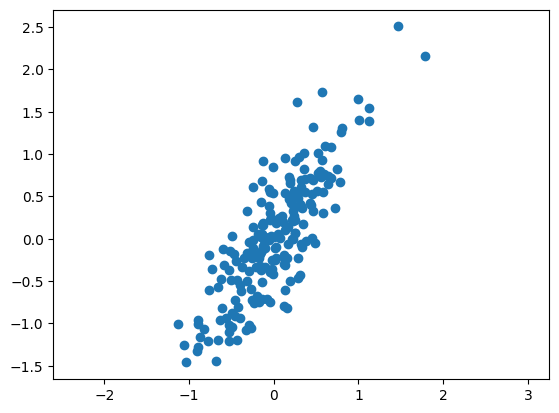

In [9]:
# create randomly distributed data points and plot the data
np.random.seed(2)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

In scikit-learn, PCA is applied by simply calling the method fit() with a PCA object with the data as argument. The argument n_components is the number of principal components, which we assign to 2 in this case, because the data is two-dimensional.

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X)

PCA(n_components=2)

In [11]:
print(pca.components_)

[[ 0.51517079  0.85708754]
 [-0.85708754  0.51517079]]


The attribute components_ is a numpy array consisting of the two principal components of the data, that is, these are the vectors of the directions of maximum variance in the data. As we mentioned, the principal components correspond to the eigenvectors of the data.

In [13]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[0.67663501 0.05315297]
[0.92716656 0.07283344]


The attribute explained_variance_ is the amount of the variance in the dataset that is explained by each of the two principal components. The explained variance in this case is [0.6766, 0.00531]. These numbers correspond to the eigenvalues of the data. Also, the explained_variance_ratio_ attribute shows the percentage, meaning that about 92.72% of the dataset variance lies along the first principal axis, and the remaining 7.28% lies on the second principal axis.

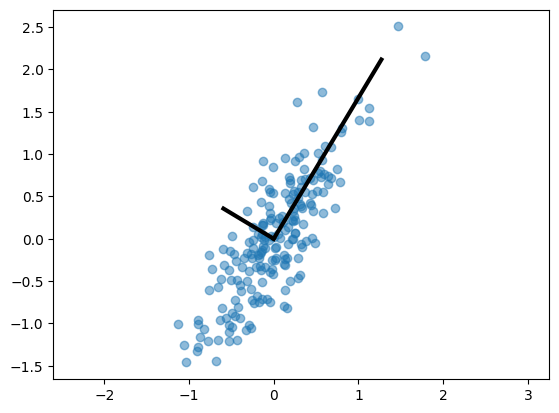

In [18]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

We can understand PCA as finding new axes along which the variance of the data is maximized. Notice in the plot that one vector is longer than the other, thus, this means that one direction in the data is more "important" than the other direction. The explained variance quantifies this measure of "importance" in both directions, and it corresponds to the length of the two axes shown in the graph.

#PCA Example
Next, let's apply PCA for reducing the dimensionality of a more realistic dataset, i.e., the wine dataset described in the next cells.

In [19]:
from sklearn.datasets import load_wine
wine = load_wine()

# Features
X = wine.data

# Target labels
y = wine.target

In [27]:
print(X.shape)
print(y.shape)
print(wine.feature_names)
list(wine.target_names)


(178, 13)
(178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


['class_0', 'class_1', 'class_2']

Number of Instances: 178,
13 numeric, predictive attributes and the class

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [29]:
print('Training data inputs', X_train.shape)
print('Training labels', y_train.shape)
print('Testing data inputs', X_test.shape)
print('Testing labels', y_test.shape)

Training data inputs (124, 13)
Training labels (124,)
Testing data inputs (54, 13)
Testing labels (54,)


In [30]:
# Let's first scale the input data with StandardScaler.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now, let's apply PCA to the dataset. We can see below the explained variance ratio for all 13 principal components listed in descending order (e.g., the first component explains 36.9%, etc.).

In [32]:
from sklearn.decomposition import PCA

pca = PCA()

X_reduced = pca.fit_transform(X_train_scaled)

pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

We can also plot the explained variance ratio, as well as the cumulative explained variance ratio. In the cumulative plot (the upper line), we can see that the first two principal components explain about 55% of the data variance.


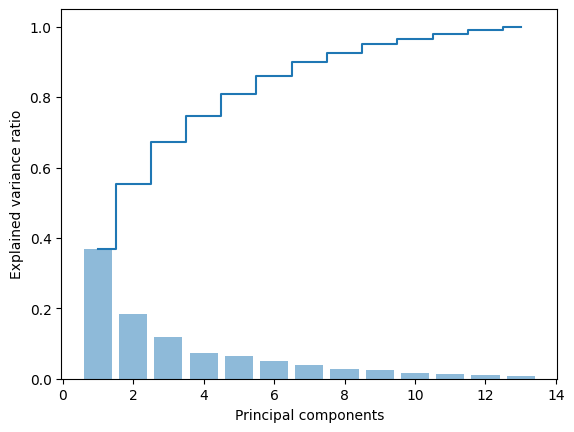

In [33]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

Next, let's project the data into a 2-dimensional space using only the first two principal components.

In [34]:
pca_2 = PCA(n_components=2)

X_train_2dim = pca_2.fit_transform(X_train_scaled)
X_test_2dim = pca_2.transform(X_test_scaled)

Note that the number of features was reduced from the original 13 features to 2 features.

In [35]:
print(X_train_2dim.shape)
print(X_test_2dim.shape)

(124, 2)
(54, 2)


And now, we can train a Logistic Regression classifier using only the first two principal components of the data.

In [36]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train_2dim, y_train)

accuracy = lr_model.score(X_test_2dim, y_test)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 92.59 %


In [43]:
n = 5
pca_n = PCA(n_components=n)

X_train_ndim = pca_n.fit_transform(X_train_scaled)
X_test_ndim = pca_n.transform(X_test_scaled)

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train_ndim, y_train)

accuracy = lr_model.score(X_test_ndim, y_test)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 94.44 %


#Choosing the Number of Principal Components
When using PCA, we need to select the number of principal components that will retain as much information as possible. One way to choose this number is based on the cumulative variance ratio, as in the next plot. For instance, the first 4 principal components will retain about 84% of the data variance.

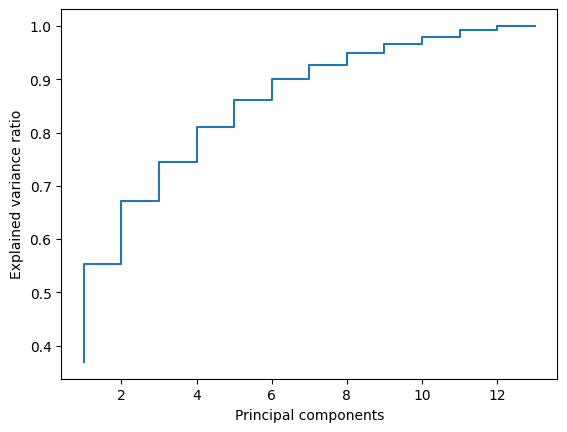

In [44]:
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

An alternative is instead of passing the number of components as the argument to the PCA object, to pass the preferred explained variance ratio. For instance, let's calculate the number of principal components that explain 96% of the data variance.

In [45]:
# Finding the number of components from desired explained variance ratio
pca_3 = PCA(n_components=0.96)

X_reduced = pca_3.fit_transform(X_train_scaled)

In [46]:
# To find the number of components, use pca_3.n_components_. The answer is 10 principal components.
pca_3.n_components_

10

In [47]:
# The explained variance ratio should be approximately 0.96.
np.sum(pca_3.explained_variance_ratio_)

0.966271440655874

#PCA for Visualizing Handwritten Digits
PCA can also be used to visualize high-dimensional datasets. Let's try to visualize the handwritten digits dataset, consisting of 8x8 pixels images (64 dimensions). We will use PCA to project those 64 dimensions into 2 dimensions (principal components) to visualize the data.

In [48]:
from sklearn.datasets import load_digits

digits = load_digits()

# features
X = digits.data

# target
y = digits.target

print(X.shape)

(1797, 64)


In [49]:
# project from 64 to 2 dimensions
pca_2dim = PCA(2)

Xproj = pca_2dim.fit_transform(X)

# shape of projected features
print(Xproj.shape)

(1797, 2)


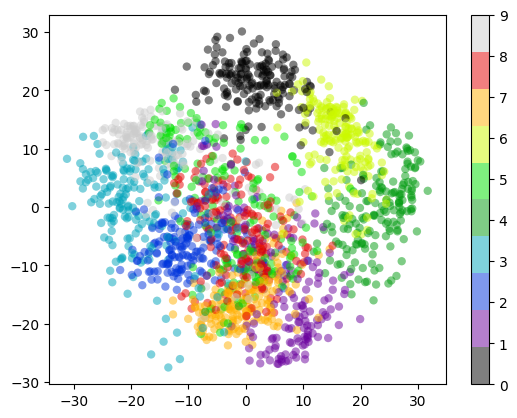

In [50]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

The scatterplot of the projected two-dimensional data is shown above. We can notice that the 10 digits have formed clusters in two dimensions, however, there is overlap between the different categories. E.g., note overlaps between digits 1 and 7, 3 and 8, etc.